## Instalando lib seaborn

In [3]:
!pip install seaborn

## Importando libs pandas, seaborn e ranksums

In [4]:
import pandas as pd
import seaborn as sns
from scipy.stats import ranksums

## Upload da base de dados

In [5]:
dados = pd.read_csv('tips_atualizado.csv')

## Verificando os tipos de dados do Data Frame

In [6]:
type(dados)

pandas.core.frame.DataFrame

## Exibindo nosso Data frame

In [7]:
dados.head(5)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Traduzindo títulos do Data Frame

In [8]:
## Confirmando o tipo e os nomes dos títulos com .columns

In [9]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [10]:
## Criamos um dicionário com a respectiva tradução de cada item

In [11]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas' 
}

In [12]:
## Criamos uma nova variável gorjetas
## Atribuimos à ela o valor da variável dados e
## Utilizando o método .rename() passamos como parâmetro das columns o nosso dicionário renomear

In [13]:
gorjetas = dados.rename(columns = renomear)

In [14]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


## Traduzindo os valores da series sobremesa

In [15]:
## Primeiro confirmamos os valores da series sobremesa com o método .unique()

In [16]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [17]:
## Após criamos um dicionário com a tradução dos valores a ser substituídos

In [18]:
sim_nao = {'No': 'Não', 'Yes': 'Sim'}

In [19]:
## Através do método .map() varrermos a series sobremesa para substituir os valores

In [20]:
gorjetas.sobremesa.map(sim_nao)

0       Não
1       Não
2       Não
3       Não
4       Não
       ... 
3411    Não
3412    Sim
3413    Sim
3414    Não
3415    Não
Name: sobremesa, Length: 3416, dtype: object

In [21]:
## Somente com o .map() os valores substituidos não são gravados, veja:

In [22]:
gorjetas.sobremesa.head(3)

0    No
1    No
2    No
Name: sobremesa, dtype: object

In [23]:
## Para salvarmos os valores da series já traduzidos temos que atribuir o .map() a uma variável

In [24]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [25]:
gorjetas.sobremesa.head(3)

0    Não
1    Não
2    Não
Name: sobremesa, dtype: object

## Traduzindo a series dia_da_semana

In [26]:
## Confirmando os valores da nossa series com o método .unique()

In [27]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [28]:
## Criando o dicionário com a tradução dos dias da semana

In [29]:
dias = {
    'Sun':'Domingo',
    'Sat':'Sábado',
    'Thur':'Quinta',
    'Fri': 'Sexta'
}

In [30]:
## Através do método .map() varrermos a series dia_da_semana para substituir os valores
## Como já sabemos que só o .map() não salva os valores traduzidos, temos que atribuir à uma variável 

In [31]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [32]:
gorjetas.dia_da_semana.head(3)

0    Domingo
1    Domingo
2    Domingo
Name: dia_da_semana, dtype: object

## Traduzindo a series hora_do_dia

In [33]:
## Confirmando os valores da nossa series com o método .unique()

In [34]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [35]:
refeicao = {
    'Dinner': 'Jantar',
    'Lunch':'Almoço'
}

In [36]:
## Através do método .map() varrermos a series hora_do_dia para substituir os valores
## Como já sabemos que só o .map() não salva os valores traduzidos, temos que atribuir à uma variável 

In [37]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(refeicao)

In [38]:
gorjetas.hora_do_dia.head()

0    Jantar
1    Jantar
2    Jantar
3    Jantar
4    Jantar
Name: hora_do_dia, dtype: object

 ## Exibindo o Data Frame já traduzido

In [39]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## Análise relacional entre o valor da conta e gorjeta

In [40]:
## Verificando quantos registros possuimos em nosso dataset

In [41]:
print(f'A base de dados possui {gorjetas.shape[0]} registros')  


A base de dados possui 3416 registros


In [42]:
## Scatter plot (gráfico de disersão)
## Indica o relacionamento entre duas variáveis numéricas (aqui valor da conta e gorjeta)

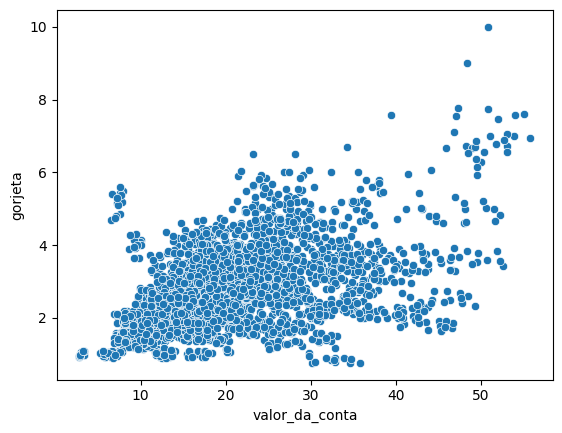

In [43]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

In [44]:
## Aparentemente há uma relação linear positiva entre o valor da conta e a gorjeta paga

## Criando a coluna porcentagem em nosso dataset

In [45]:
## Ao dividir a gorjeta pelo valor da conta obtemos a porcentagem

In [46]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [47]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [48]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447


In [49]:
## Arredondando os valores da nossa coluna porcentagem

In [50]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [51]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


## Análise relacional entre o valor da conta e porcentagem

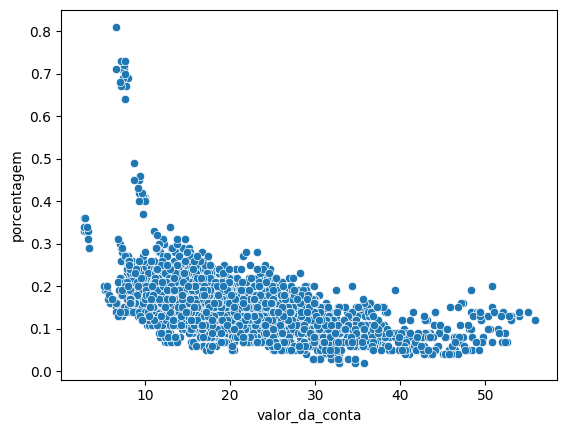

In [52]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

In [53]:
## Visualmente há uma relação neutra entre o valor da conta e a porcentagem

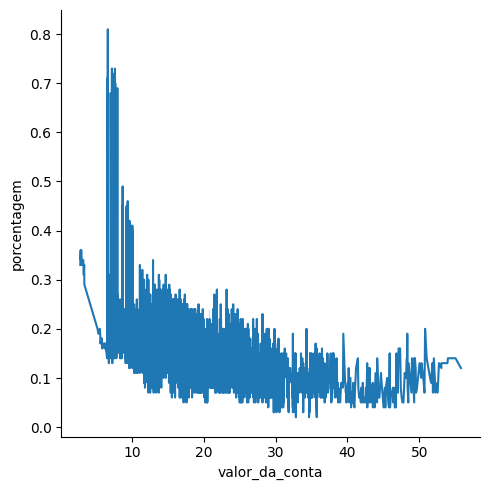

In [54]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line', data = gorjetas)

## Analisando a relação entre o valor da conta, gorjeta e sobremesa

In [55]:
## Através do método .describe() retornamos a descrição dos dados selecionados
## Podemos passar parâmetros na função .describe() 

In [56]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [57]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


In [58]:
## Verificando a relação entre valor da conta, gorjeta e separando quem pediu ou não sobremesa

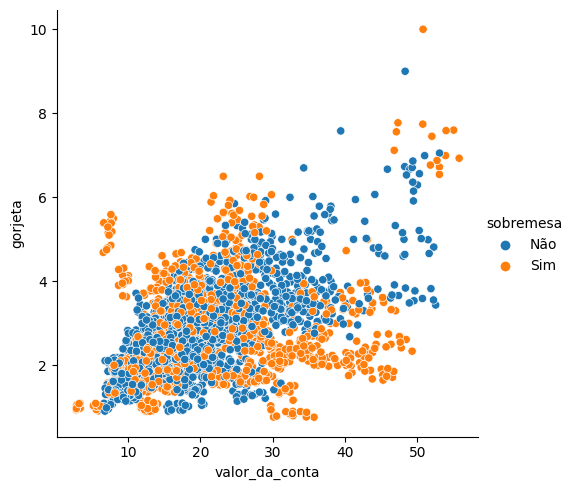

In [59]:
sobremesa_gorjeta_rel = sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas )

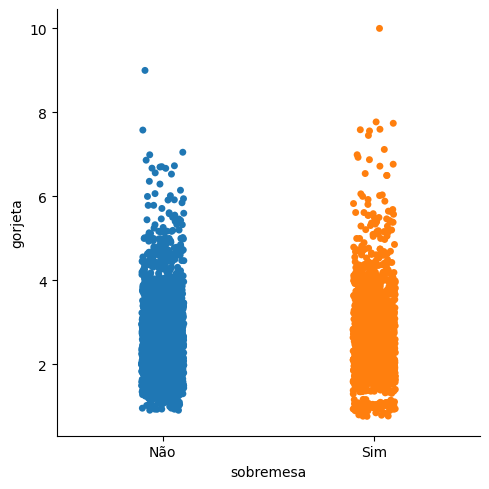

In [60]:
sobremesa_gorjeta_cat = sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

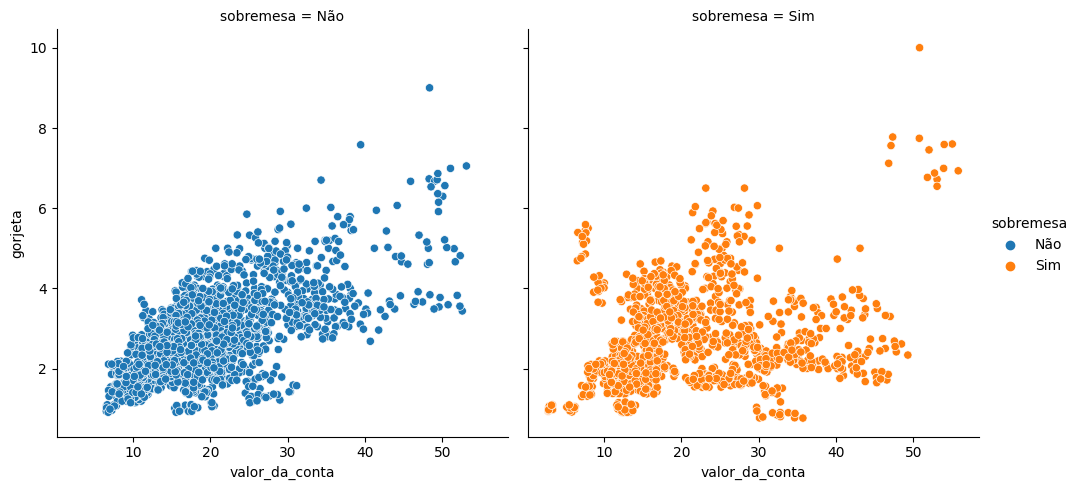

In [61]:
sobremesa_gorjeta_rel_col = sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas )

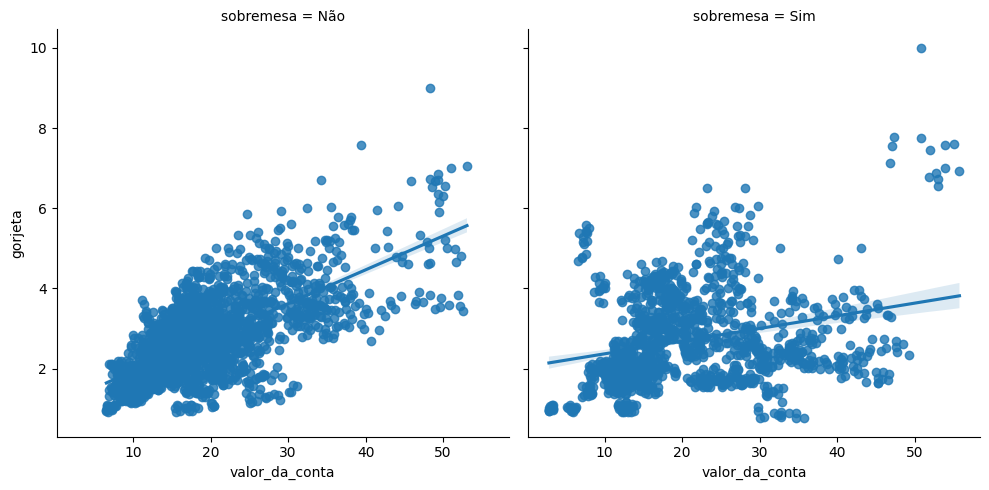

In [62]:
sobremesa_gorjeta_lm_col = sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa', data = gorjetas)

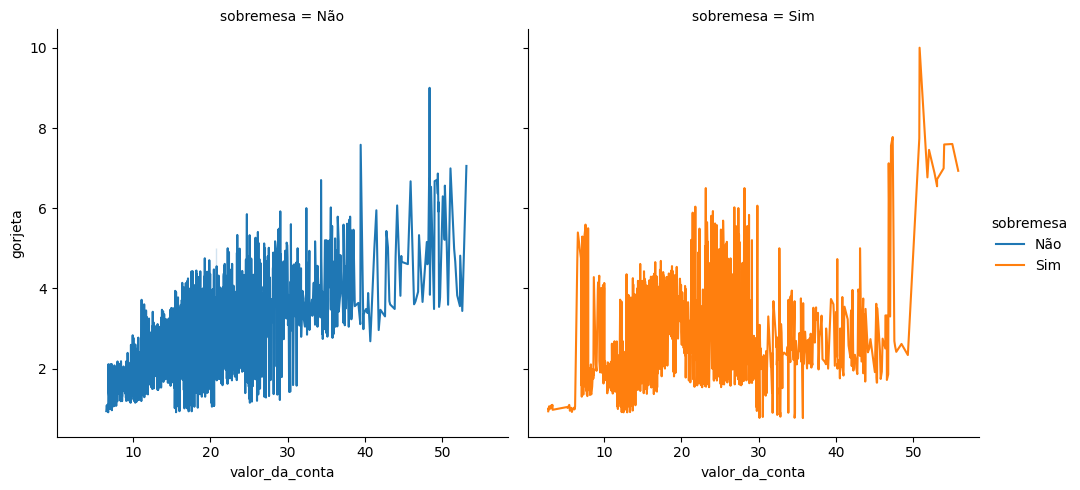

In [63]:
sobremesa_gorjeta_rel_line = sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', kind = 'line', data = gorjetas )

In [64]:
## Visualmente existe uma diferença entre a gorjeta daqueles que pediram sobremesa em relação aos que não pediram

## Teste de hipótese da distribuição da taxa da gorjeta

In [65]:
## As hipóteses nula e alternativa são duas declarações mutuamente exclusivas sobre uma população
## Um teste de hipótese usa dados amostrais para determinar se deve rejeitar a hipótese nula

Hipótese null - A distribuição da taxa da gorjeta é a mesma nos dois grupos

Hipótese alternativa - A distribuição da taxa da gorjeta não é a mesma nos dois grupos

OBS - A hipótese nula é rejeitada se o P-value for 0.05 ou menor

In [66]:
## Os métodos .query, .loc e.iloc são utilizados p/ consultarmos algo dentro dos dados, cada qual com sua diferença
## O p-value (valor da probabilidade) mede a probabilidade de obter o resultado observado, se p-value for > 0.05 a hipóstese nula é verdadeira
## O ranksum é uma funcionalidade da lib scipy que calcula o p-value

In [67]:
com_sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [68]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [69]:
r = ranksums(com_sobremesa, sem_sobremesa)

In [70]:
print(f"O p-value é {r.pvalue}")

O p-value é 0.033144013617673405


In [71]:
## Resultado: A distribuição da taxa da gorjeta não é a mesma nos dois grupos

## Análise da series dia da semana

In [ ]:
## Verificando nosso Data Frame
## Retornando com o método .unique() os valores contidos na series dia_da_semana

In [72]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


In [74]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [ ]:
## Aqui basicamente repito os processos já realizados na análise do tópico anterior
## Então não explicarei em detalhes o passo a passo

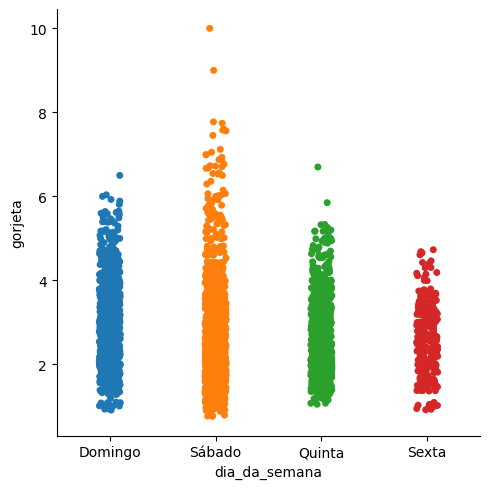

In [76]:
gorjeta_dia_semana_cat = sns.catplot(x = 'dia_da_semana', y = 'gorjeta', data = gorjetas)

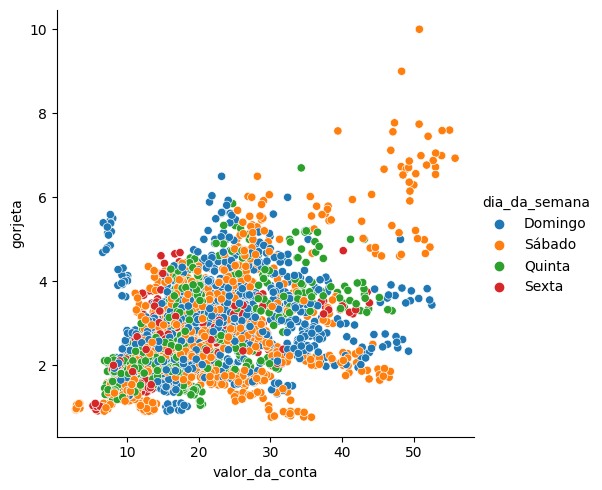

In [81]:
gorjeta_dia_semana_rel = sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', data = gorjetas)

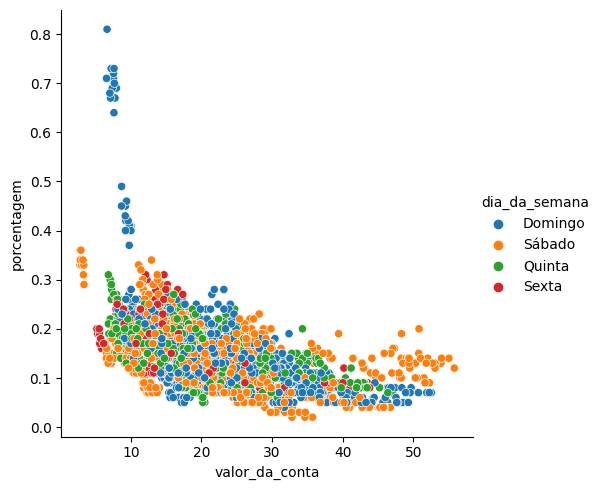

In [83]:
gorjeta_porcentagem_dia_semana_rel = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', data = gorjetas)

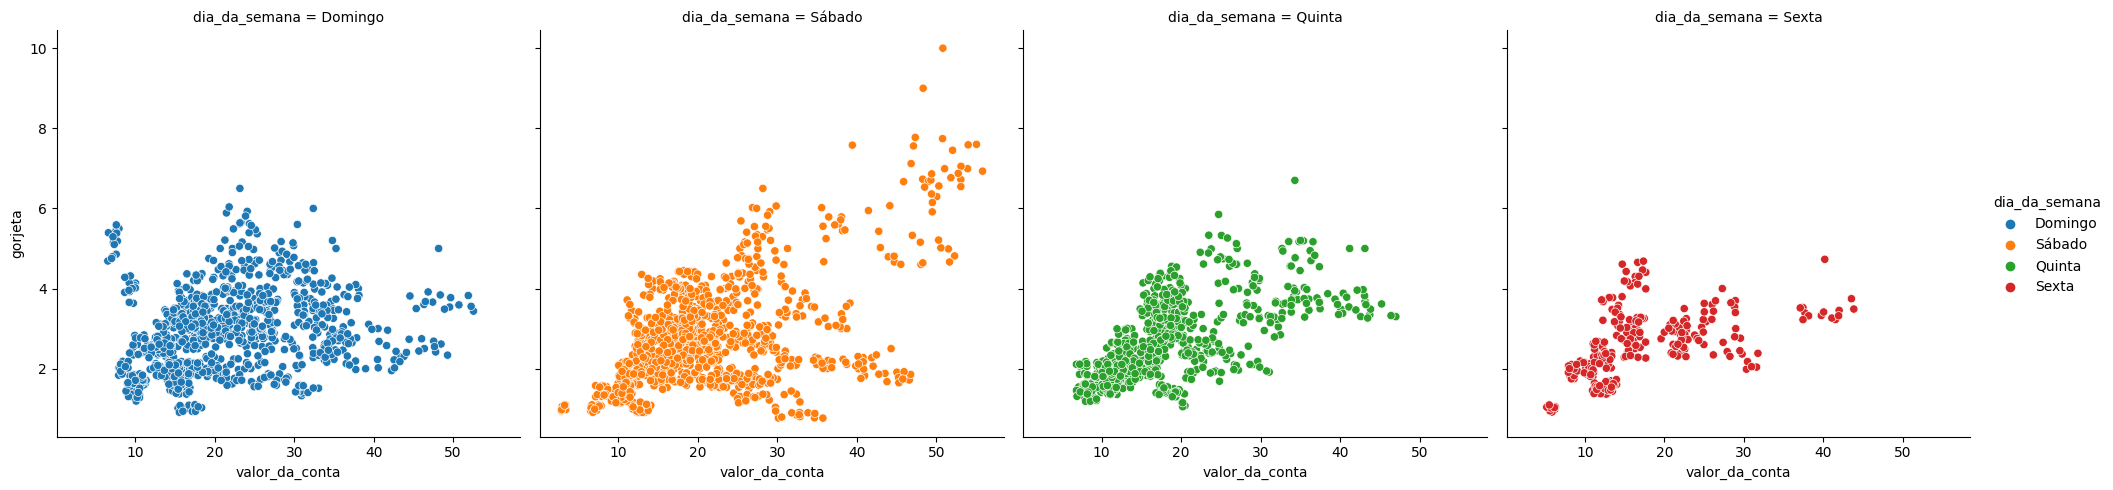

In [88]:
gorjeta_valor_dia_semana_rel_col = sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col ='dia_da_semana', data = gorjetas)

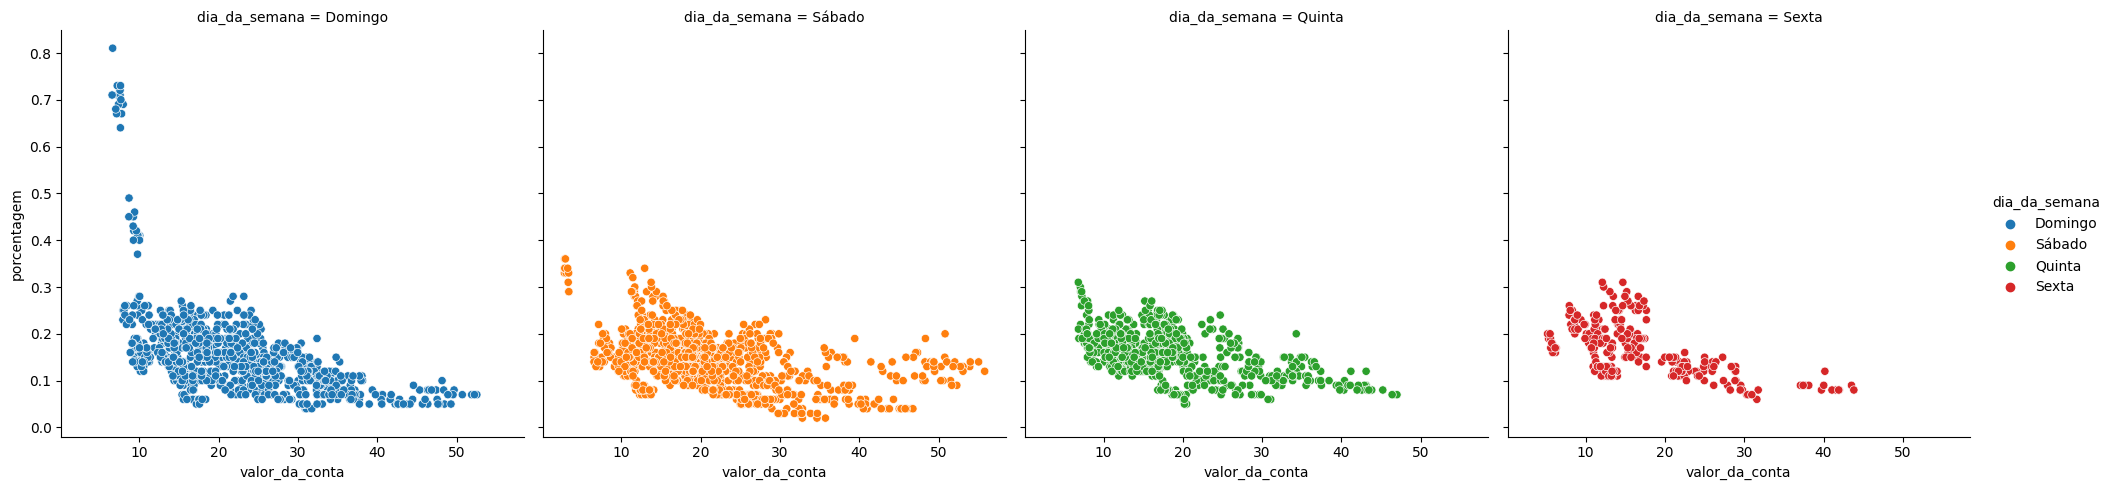

In [87]:
gorjeta_porcentagem_dia_semana_rel_col = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col ='dia_da_semana', data = gorjetas)

In [ ]:
## visualmente há um volume maior de gorjetas e porcentagem aos sábados e domingos
## percentualmente aos domingos a gorjeta não é  proporcional ao valor da conta

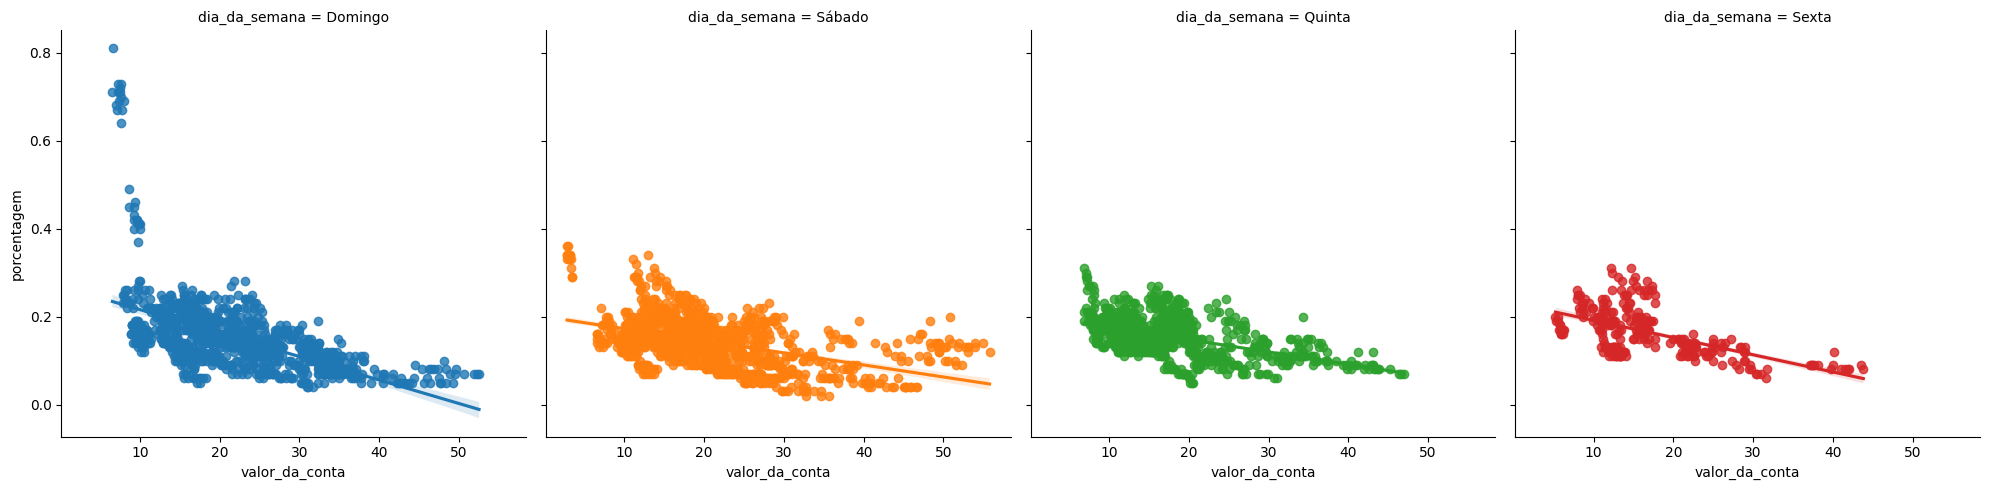

In [89]:
gorjeta_porcentagem_dia_semana_lm_col = sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col ='dia_da_semana', data = gorjetas)

In [ ]:
## Verificando a média geral através do método .mean()
## Agrupando os dias da semana com .groupby() e tirando a média das series valor da conta, gorjeta e % p/ cada dia 

In [93]:
print(f"A média geral das gorjetas é {gorjetas.gorjeta.mean().round(5)}.")

A média geral das gorjetas é 2.71119.


In [102]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.439133,2.902079,0.154953
Quinta,17.724088,2.556177,0.154090
Sexta,17.215616,2.549960,0.163158
Sábado,20.480249,2.690114,0.143604


In [ ]:
## Através da média confirmamos a hipótese de que aos domingos o valor de gorjeta é maior

In [99]:
## Verificando a frequência dos dias da semana com o método .value_counts()

In [101]:
print('Frequência de clientes em cada dia:')
gorjetas.dia_da_semana.value_counts()

Frequência de clientes em cada dia:


Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

In [103]:
## Sábado e domingo são os dias com maior frequência de clientes

## Teste de hipótese da distribuição do valor da conta aos sábados e domingos

Hipótese null - A distribuição do valor da conta é igual no sábado e no domingo

Hipótese alternativa - A distribuição do valor da conta não é igual no sábado e no domingo

OBS - A hipótese nula é rejeitada se o P-value for 0.05 ou menor.


In [106]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [110]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f"O p-value é {r2.pvalue}")

O p-value é 0.0004435935681441821


In [111]:
## A distribuição do valor da conta não é igual aos sábados e domingos
## Este teste de hipótese confirma nossa análise visual feita anteriormente

## Análise da series hora do dia

In [112]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


In [113]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

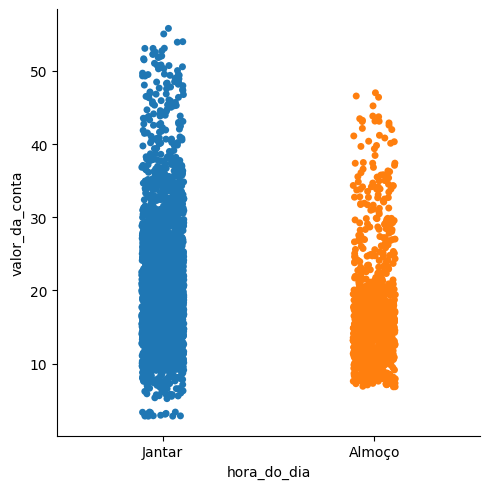

In [115]:
valor_conta_hora_dia = sns.catplot( x = 'hora_do_dia',  y = 'valor_da_conta', data = gorjetas)

In [116]:
## Verificando outros tipos de gráficos

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

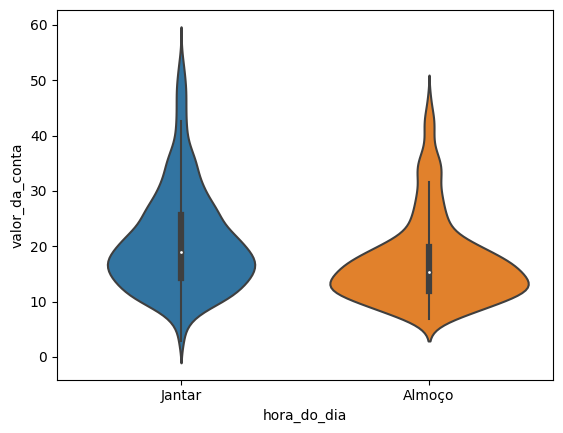

In [121]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

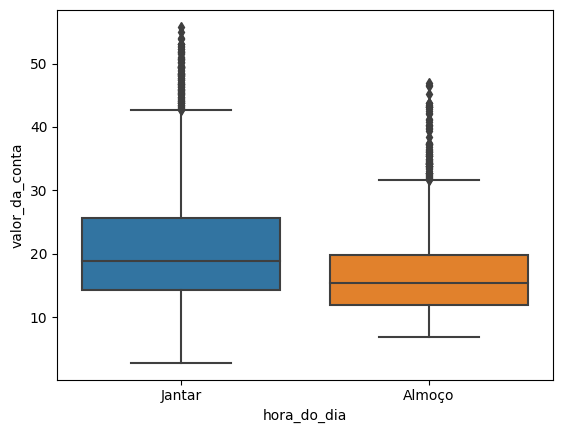

In [122]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

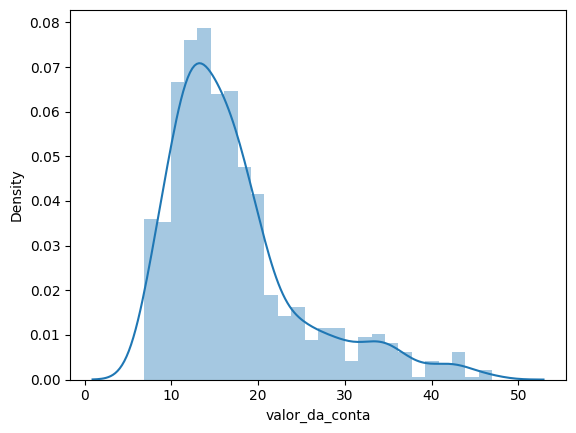

In [128]:
sns.distplot(gorjetas_almoco)

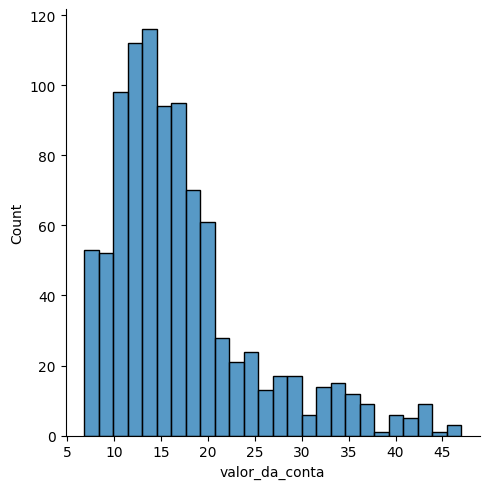

In [131]:
sns.displot(gorjetas_almoco)

In [132]:
gorjetas.groupby(['hora_do_dia']).mean([['valor_da_conta', 'gorjeta', 'porcentagem']])

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
hora_do_dia,,,,
Almoço,17.213913,2.534495,2.411765,0.157668
Jantar,20.832954,2.779458,2.630682,0.148876


In [135]:
## No jantar o valor da conta e da gorjeta são maiores que no almoço

## Teste de hipótese da distribuição do valor da conta aos sábados e domingos

Hipótese null - A distribuição do valor da conta é igual no almoço e no jantar

Hipótese alternativa - A distribuição do valor da conta não é igual no almoço e no jantar

OBS - A hipótese nula é rejeitada se o P-value for 0.05 ou menor.

In [146]:
valor_da_conta_almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
valor_da_conta_jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

In [147]:
r3 = ranksums(gorjetas_jantar, gorjetas_almoco)
print(f"O p-value é {r3.pvalue}")

O p-value é 1.3785725618355523e-11


In [153]:
## A distribuição do valor da conta é igual no almoço e no jantar

## Teste de hipótese da distribuição da porcentagem aos sábados e domingos

Hipótese null - A distribuição da porcentagem é igual no almoço e no jantar

Hipótese alternativa - A distribuição da porcentagem não é igual no almoço e no jantar

OBS - A hipótese nula é rejeitada se o P-value for 0.05 ou menor.

In [148]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [151]:
r4 = ranksums(porcentagem_jantar, porcentagem_almoco)
print(f"O p-value é {r3.pvalue}")

O p-value é 1.3785725618355523e-11


In [152]:
## A distribuição da porcentagem é igual no almoço e no jantar